In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [57]:
bp = pd.read_csv(r"F:/python/imarticus/dataset/Patient_with_abnormal_bloodpressure.csv")

In [58]:
bp.shape

(2000, 14)

In [59]:
bp

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
5,0,11.64,0.54,23,48,0,NaN,1,27042,7513,NaN,3,0,0
6,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
7,0,12.70,0.41,48,20,0,NaN,0,29781,26749,134.0,2,0,0
8,0,10.88,0.68,72,44,0,NaN,0,814,9607,99.0,3,0,0
9,1,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0


In [34]:
bp["Blood_Pressure_Abnormality"].value_counts()bp["Blood_Pressure_Abnormality"])

SyntaxError: invalid syntax (<ipython-input-34-0f8cdace3fc5>, line 1)

In [47]:
bp.groupby(['Blood_Pressure_Abnormality'])["Level_of_Hemoglobin"].mean()

Blood_Pressure_Abnormality
0    11.409033
1    12.018967
Name: Level_of_Hemoglobin, dtype: float64

In [71]:
bp.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [60]:
gpc_median = bp["Genetic_Pedigree_Coefficient"][bp["Genetic_Pedigree_Coefficient"]!=bp["Genetic_Pedigree_Coefficient"].isnull()].median()

In [61]:
#replace nulls

bp["Genetic_Pedigree_Coefficient"] = bp["Genetic_Pedigree_Coefficient"].fillna(gpc_median)

In [62]:
bp["Pregnancy"] = bp["Pregnancy"].fillna(0)

In [63]:
bp["alcohol_consumption_per_day"] = bp["alcohol_consumption_per_day"].fillna(bp.alcohol_consumption_per_day.median(skipna=True))

In [40]:
#data is not skewed
#check skewness of all numeric columns

from scipy.stats import kurtosis
from scipy.stats import skew


data_skewed = bp.apply(lambda x:skew(x))
data_skewed

Blood_Pressure_Abnormality       0.026002
Level_of_Hemoglobin              0.656573
Genetic_Pedigree_Coefficient     0.013016
Age                              0.021162
BMI                             -0.017542
Sex                              0.016001
Pregnancy                        2.675957
Smoking                         -0.038007
Physical_activity               -0.010551
salt_content_in_the_diet        -0.021781
alcohol_consumption_per_day     -0.006083
Level_of_Stress                 -0.023161
Chronic_kidney_disease          -0.020001
Adrenal_and_thyroid_disorders    0.227457
dtype: float64

Histogram of Blood_Pressure_Abnormality
Histogram of Level_of_Hemoglobin
Histogram of Genetic_Pedigree_Coefficient
Histogram of Age
Histogram of BMI
Histogram of Sex
Histogram of Pregnancy
Histogram of Smoking
Histogram of Physical_activity
Histogram of salt_content_in_the_diet
Histogram of alcohol_consumption_per_day
Histogram of Level_of_Stress
Histogram of Chronic_kidney_disease
Histogram of Adrenal_and_thyroid_disorders


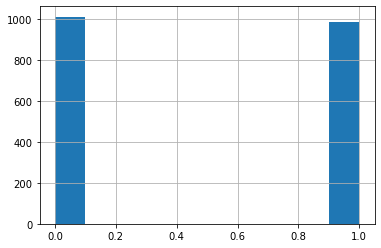

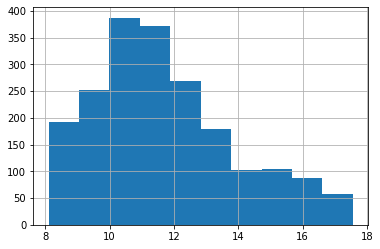

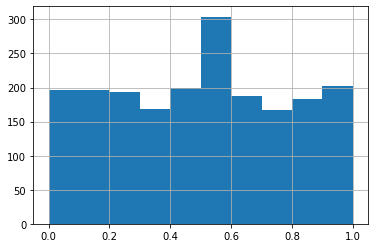

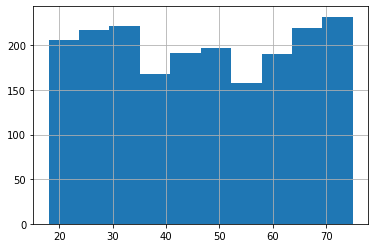

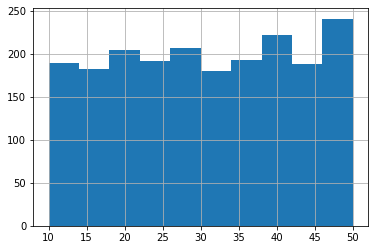

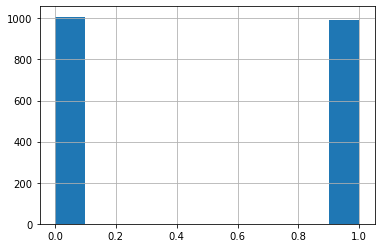

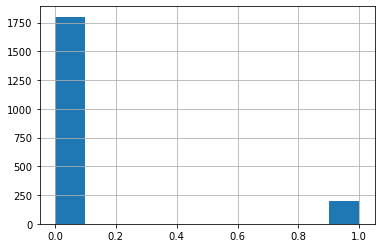

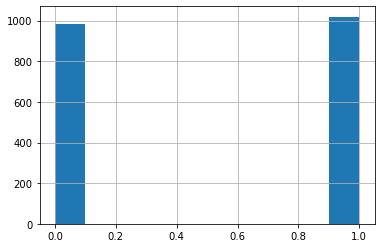

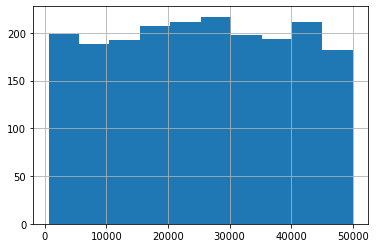

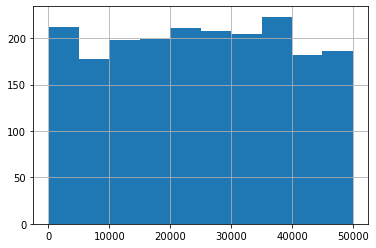

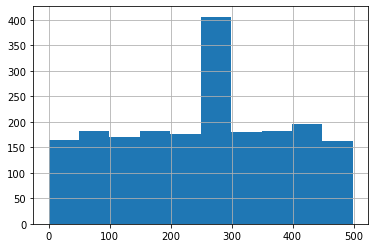

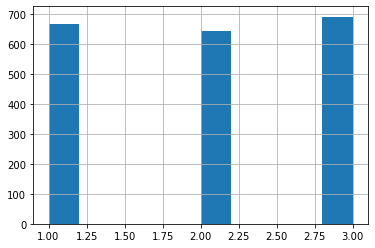

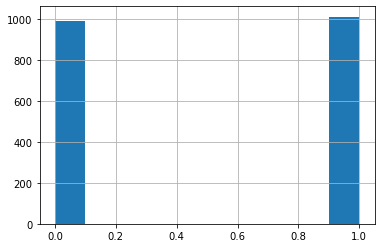

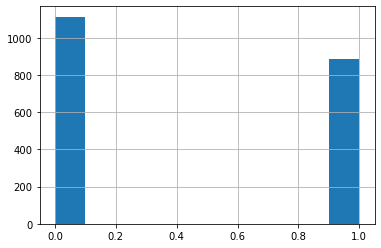

In [24]:
for i in bp.columns:
    plt.figure()
    bp[i].hist()
    print("Histogram of", i)

# Model Building

In [64]:
bp_x = bp.iloc[:,1:]
bp_y = bp.iloc[:,0]

In [65]:
bp_x_train,bp_x_test,bp_y_train,bp_y_test = train_test_split(bp_x,bp_y, test_size = 0.2)

In [66]:
# data is not imbalanced

bp['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

### Logistic Regression

In [67]:
lgm = LogisticRegression()

In [68]:
lgm.fit(bp_x_train, bp_y_train)

C:\Users\91991\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
lgm_predict = lgm.predict(bp_x_test)
print("model has been predicted")

model has been predicted


In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

lgm_cm = confusion_matrix(lgm_predict,bp_y_test) 
print(lgm_cm)
print(classification_report(lgm_predict,bp_y_test))

[[ 89  90]
 [ 96 125]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       179
           1       0.58      0.57      0.57       221

    accuracy                           0.54       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.54      0.54      0.54       400



### Feature Selection Techniques

#### RFE

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [73]:
rf = RandomForestClassifier()

In [395]:
rfe_rfc = RFE(rf, 12)

In [396]:
rfe_rfc.fit(bp_x,bp_y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [116]:
rfe_rfc.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [117]:
feature_importance = pd.DataFrame({"Features":list(bp_x.columns),"Importance":list(rfe_rfc.support_)})
# sorted
feature_importance.sort_values("Importance",ascending = False)

,Features,Importance
0,Level_of_Hemoglobin,True
1,Genetic_Pedigree_Coefficient,True
2,Age,True
3,BMI,True
4,Sex,True
6,Smoking,True
7,Physical_activity,True
8,salt_content_in_the_diet,True
9,alcohol_consumption_per_day,True
10,Level_of_Stress,True


#### Boruta

In [118]:
from boruta import BorutaPy
rf = RandomForestClassifier()

In [119]:
bp_xn = bp.iloc[:,1:]

In [120]:
import numpy as np
bp_dup = np.array(bp_xn)

In [121]:
boruta_feature_selector = BorutaPy(rf, random_state = 111, max_iter =30, perc = 100, verbose = 2)
boruta_feature_selector

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=None,
                                          oob_score=False, random_state=None,
                                          verbose=0, warm_start=False),
         max_iter=30, n_estimators=1000, perc=100, random_state=111,
         two_step=True, verbose=2)

In [122]:
#do feature selection on your entire data

boruta_feature_selector.fit(bp_dup,bp_y)

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	4
Tentative: 	1
Rejected: 	8
Iteration: 	9 / 30
Confirmed: 	4
Tentative: 	1
Rejected: 	8
Iteration: 	10 / 30
Confirmed: 	4
Tentative: 	1
Rejected: 	8
Iteration: 	11 / 30
Confirmed: 	4
Tentative: 	1
Rejected: 	8
Iteration: 	12 / 30
Confirmed: 	4
Tentative: 	0
Rejected: 	9


BorutaPy finished running.

Iteration: 	13 / 30
Confirmed: 	4
Tentative: 	0
Rejected: 	9


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=1000, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x1C573EBF9D8,
                                          verbose=0, warm_start=False),
         max_iter=30, n_estimators=

In [123]:
boruta_feature_selector.support_

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [124]:
boruta_feature = pd.DataFrame({"Feature":list(bp_x.columns),"importance":list(boruta_feature_selector.support_)})
boruta_feature.sort_values("importance", ascending = False)

,Feature,importance
0,Level_of_Hemoglobin,True
1,Genetic_Pedigree_Coefficient,True
11,Chronic_kidney_disease,True
12,Adrenal_and_thyroid_disorders,True
2,Age,False
3,BMI,False
4,Sex,False
5,Pregnancy,False
6,Smoking,False
7,Physical_activity,False


#### chi square method

In [126]:
test = SelectKBest(score_func = chi2, k = "all")

In [127]:
fited = test.fit(bp_x,bp_y)

In [131]:
fited.scores_

array([1.58819593e+01, 3.56217286e-01, 5.52731166e+01, 1.48496735e+01,
       3.03838729e+00, 4.61940224e-01, 1.47217234e-01, 2.23949405e+04,
       3.26548851e+03, 5.36092023e+01, 5.83590863e-02, 1.82360083e+02,
       1.12974982e+02])

In [132]:
feature_importance = pd.DataFrame({"Features":list(bp_x_test.columns),"Importance":list(fited.scores_)})
# sorted
feature_importance.sort_values("Importance",ascending = False)

,Features,Importance
7,Physical_activity,22394.940484
8,salt_content_in_the_diet,3265.488508
11,Chronic_kidney_disease,182.360083
12,Adrenal_and_thyroid_disorders,112.974982
2,Age,55.273117
9,alcohol_consumption_per_day,53.609202
0,Level_of_Hemoglobin,15.881959
3,BMI,14.849674
4,Sex,3.038387
5,Pregnancy,0.461940


#### Heatmap

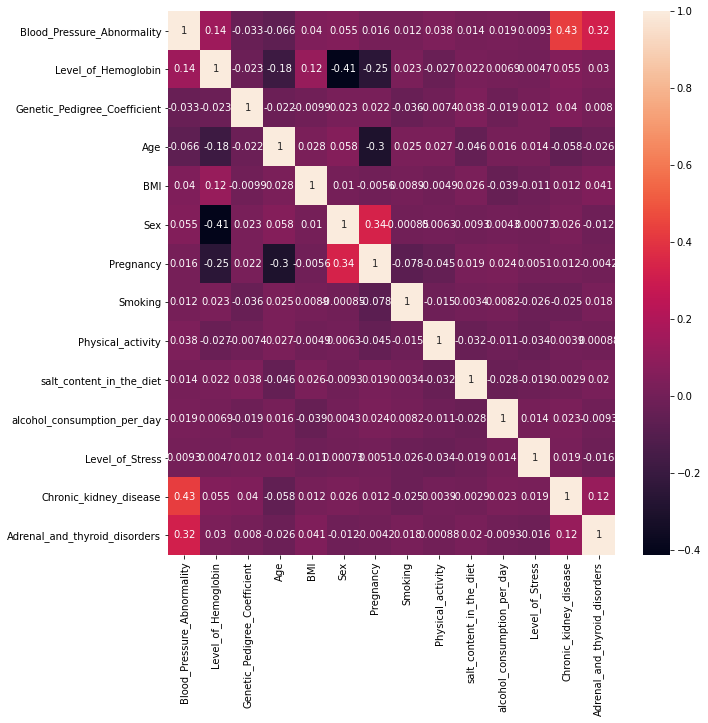

In [42]:

plt.figure(figsize=(10,10))
sns.heatmap(bp.corr(), annot=True)

#model 2: 

In [74]:
#remove features and build model again
bp2 = bp[['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex',
       'Physical_activity',
       'alcohol_consumption_per_day',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders','salt_content_in_the_diet']]

In [75]:
bp2_x = bp2.iloc[:,1:]
bp2_y = bp2.iloc[:,0]

In [76]:
bp2_x_train,bp2_x_test,bp2_y_train,bp2_y_test = train_test_split(bp2_x,bp2_y, test_size = 0.2)

In [77]:
#logistic regression on filtered data
lgm_new = LogisticRegression()
lgm_new.fit(bp2_x_train, bp2_y_train)

C:\Users\91991\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
predict_lgm = lgm_new.predict(bp2_x_test)

In [79]:
cm_bp2 = confusion_matrix(predict_lgm, bp2_y_test)
print(cm_bp2)
print(classification_report(bp2_y_test, predict_lgm))

[[109  89]
 [ 76 126]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       185
           1       0.62      0.59      0.60       215

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400



In [80]:
lgm_cm # with all features(lgm_cm)

array([[ 89,  90],
       [ 96, 125]], dtype=int64)

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtree = DecisionTreeClassifier(criterion= "entropy")

In [83]:
#decision tree on filtered data

dtree.fit(bp2_x_train, bp2_y_train)

DecisionTreeClassifier(criterion='entropy')

In [84]:
pred_dt = dtree.predict(bp2_x_test)

In [85]:
dt_cm = confusion_matrix(pred_dt, bp2_y_test)
print(dt_cm)
print(classification_report(bp2_y_test, pred_dt))

[[155  32]
 [ 30 183]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       185
           1       0.86      0.85      0.86       215

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



#### DT on main data

In [86]:
dtree2 = DecisionTreeClassifier(criterion= "entropy")

In [87]:
dtree2.fit(bp_x_train, bp_y_train)

DecisionTreeClassifier(criterion='entropy')

In [88]:
pred_dt2 = dtree2.predict(bp_x_test)

In [89]:
dt_cm2 = confusion_matrix(pred_dt2, bp_y_test)
dt_cm2

array([[161,  32],
       [ 24, 183]], dtype=int64)

In [90]:
print(classification_report(bp_y_test, pred_dt2))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       185
           1       0.88      0.85      0.87       215

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



### Observation:
- filtered and main data giving almost similar accuracy due to very less coorelation between x- variables

In [91]:
dtree.feature_importances_

array([0.29853206, 0.28447052, 0.0599098 , 0.0538326 , 0.01516102,
       0.04673623, 0.0453674 , 0.13471711, 0.03693193, 0.02434132])

In [92]:
feature_importance = pd.DataFrame({"Features":list(bp_x_test.columns), "Importance":list(dtree2.feature_importances_)})
feature_importance.sort_values("Importance", ascending = False)

,Features,Importance
0,Level_of_Hemoglobin,0.307516
1,Genetic_Pedigree_Coefficient,0.265926
11,Chronic_kidney_disease,0.133023
9,alcohol_consumption_per_day,0.055505
2,Age,0.048637
3,BMI,0.047662
7,Physical_activity,0.036314
8,salt_content_in_the_diet,0.034854
12,Adrenal_and_thyroid_disorders,0.028231
4,Sex,0.018343


# Random Forest

In [93]:
# random forest on main data

rf = RandomForestClassifier(criterion='entropy')

In [94]:
rf.fit(bp_x_train, bp_y_train)

RandomForestClassifier(criterion='entropy')

In [95]:
pred_rf = rf.predict(bp_x_test)

In [96]:
cm_rf = confusion_matrix(pred_rf, bp_y_test)
cm_rf

array([[167,  13],
       [ 18, 202]], dtype=int64)

In [97]:
print(classification_report(bp_y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       185
           1       0.92      0.94      0.93       215

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



#### random forest on filtered data

In [98]:
rf2 = RandomForestClassifier()

In [99]:
rf2.fit(bp2_x_train, bp2_y_train)

RandomForestClassifier()

In [100]:
pred_rf2 = rf2.predict(bp2_x_test)

In [101]:
cm_rf2 = confusion_matrix(pred_rf2, bp2_y_test)
cm_rf2

array([[160,  19],
       [ 25, 196]], dtype=int64)

In [102]:
print(classification_report(pred_rf2, bp2_y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       179
           1       0.91      0.89      0.90       221

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [103]:
rf.feature_importances_

array([0.22883533, 0.23114591, 0.06516107, 0.05935406, 0.01548234,
       0.00685936, 0.01144422, 0.06795393, 0.07156954, 0.06227954,
       0.01822992, 0.10406377, 0.05762102])

In [104]:
feature_importance = pd.DataFrame({"Features":list(bp_x_test.columns), "Importance":list(rf.feature_importances_)})
feature_importance.sort_values("Importance", ascending = False)

,Features,Importance
1,Genetic_Pedigree_Coefficient,0.231146
0,Level_of_Hemoglobin,0.228835
11,Chronic_kidney_disease,0.104064
8,salt_content_in_the_diet,0.071570
7,Physical_activity,0.067954
2,Age,0.065161
9,alcohol_consumption_per_day,0.062280
3,BMI,0.059354
12,Adrenal_and_thyroid_disorders,0.057621
10,Level_of_Stress,0.018230


# Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [106]:
gaussian = GaussianNB()

In [107]:
#naive bayes on filteres data

gaussian.fit(bp2_x_train, bp2_y_train)

GaussianNB()

In [108]:
pred_naive = gaussian.predict(bp2_x_test)

In [109]:
cm_naive = confusion_matrix(pred_naive, bp2_y_test)
cm_naive

array([[163,  74],
       [ 22, 141]], dtype=int64)

In [110]:
print(classification_report(pred_naive, bp2_y_test))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       237
           1       0.66      0.87      0.75       163

    accuracy                           0.76       400
   macro avg       0.77      0.78      0.76       400
weighted avg       0.79      0.76      0.76       400



# SVM

In [111]:
from sklearn.svm import SVC
svc = SVC()

In [112]:
svc.fit(bp2_x_train, bp2_y_train)

SVC()

In [113]:
pred_svm = svc.predict(bp2_x_test)

In [114]:
cm_svm = confusion_matrix(pred_svm, bp2_y_test)
cm_svm

array([[158, 176],
       [ 27,  39]], dtype=int64)

In [115]:
print(classification_report(pred_svm, bp2_y_test))

              precision    recall  f1-score   support

           0       0.85      0.47      0.61       334
           1       0.18      0.59      0.28        66

    accuracy                           0.49       400
   macro avg       0.52      0.53      0.44       400
weighted avg       0.74      0.49      0.55       400



# Gradient Boosting

In [116]:
#gradient boosting on main data

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [117]:
gbc.fit(bp_x_train, bp_y_train)

GradientBoostingClassifier()

In [118]:
pred_gbc = gbc.predict(bp_x_test)

In [119]:
cm_gbc = confusion_matrix(pred_gbc, bp_y_test)
cm_gbc

array([[173,  22],
       [ 12, 193]], dtype=int64)

In [120]:
print(classification_report(pred_gbc, bp_y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       195
           1       0.90      0.94      0.92       205

    accuracy                           0.92       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.92      0.91       400



#### GB on filtered data

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbc2 = GradientBoostingClassifier()

In [122]:
gbc2.fit(bp2_x_train, bp2_y_train)

GradientBoostingClassifier()

In [123]:
pred_gbc2 = gbc2.predict(bp2_x_test)

In [124]:
cm_gbc2 = confusion_matrix(pred_gbc2 , bp2_y_test)
cm_gbc2

array([[167,  25],
       [ 18, 190]], dtype=int64)

In [125]:
print(classification_report(pred_gbc2 , bp2_y_test)) # Almost same accuracy in both model again

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       192
           1       0.88      0.91      0.90       208

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



# Ada Boosting

In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [134]:
ada = AdaBoostClassifier(RandomForestClassifier(), n_estimators=25)

In [135]:
ada.fit(bp2_x_train, bp2_y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=25)

In [136]:
pred_ada = ada.predict(bp2_x_test)

In [137]:
cm_ada = confusion_matrix(pred_ada, bp2_y_test)
cm_ada

array([[162,  19],
       [ 23, 196]], dtype=int64)

In [138]:
print(classification_report(pred_ada, bp2_y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       181
           1       0.91      0.89      0.90       219

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



## XGBoost Classifier

In [209]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(bp2_x_train, bp2_y_train)
print("model has been fitted")

pred_xgb = xgb.predict(bp2_x_test)
print("model has been predicted")

cm_xgbos = confusion_matrix(pred_xgb, bp2_y_test)
print(cm_xgbos)
print(classification_report(pred_xgb, bp2_y_test))


model has been fitted
model has been predicted
[[165  21]
 [ 20 194]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       186
           1       0.90      0.91      0.90       214

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



### I will choose gradeint boosting for my model deployment as it is giving higest accuracy with good confusion metrix

In [210]:
import pickle

In [214]:
pickle.dump(rf2, open('rf_predictor_bp.pkl','wb'))

In [212]:
model = pickle.load(open('rf_predictor_bp.pkl','rb'))

In [213]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)